# Exploratory Data Analysis - Retail
**Author: Ishani Kathuria**

In [1]:
# importing the necessary packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
# importing the dataset as a pandas dataframe
original_data = pd.read_csv("SampleSuperstore.csv")
original_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Preprocessing the data

Checking the shape of the dataset and the different columns with their values.

In [3]:
original_data.shape

(9994, 13)

In [4]:
original_data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [5]:
for columnName in original_data:
    print(columnName, original_data[columnName].unique())
    print()

Ship Mode ['Second Class' 'Standard Class' 'First Class' 'Same Day']

Segment ['Consumer' 'Corporate' 'Home Office']

Country ['United States']

City ['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield' 'Akron'
 'Denver' 'Dallas' 'Whittier' 'Saginaw' 'Medina' 'Dublin' 'Detroit'
 'Tampa' 'Santa Clara' 'Lakeville' 'San Diego' 'Brentwood' 'Chapel Hill'
 'Mor

Dropping Country (same for all) as well as Postal Code column as they won't provide any insight into the data.

In [6]:
original_data = original_data.drop(columns=['Country', 'Postal Code'])
original_data.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [7]:
original_data.count()

Ship Mode       9994
Segment         9994
City            9994
State           9994
Region          9994
Category        9994
Sub-Category    9994
Sales           9994
Quantity        9994
Discount        9994
Profit          9994
dtype: int64

Dropping duplicates.

In [8]:
retail_data = original_data.drop_duplicates()
print("Shape of dataset:", retail_data.shape)
retail_data

Shape of dataset: (9944, 11)


,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


Checking for any null values.

In [9]:
retail_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9944 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9944 non-null   object 
 1   Segment       9944 non-null   object 
 2   City          9944 non-null   object 
 3   State         9944 non-null   object 
 4   Region        9944 non-null   object 
 5   Category      9944 non-null   object 
 6   Sub-Category  9944 non-null   object 
 7   Sales         9944 non-null   float64
 8   Quantity      9944 non-null   int64  
 9   Discount      9944 non-null   float64
 10  Profit        9944 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 932.2+ KB


In [10]:
retail_data.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## Visualizing the data

### Correlations

Plotting a heatmap to see the different correlations between the data points. It is observed that Sales and Profit columns have the maximum positive correlation.

Discount has a negative correlation with Profit and should be worked upon.

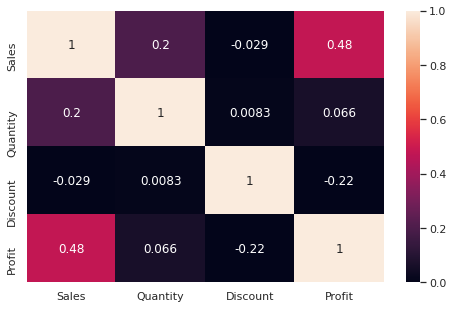

In [11]:
plt.figure(figsize=(8,5))
sns.heatmap(retail_data.corr(), annot=True, vmin=0);

### Stateise and Citywise data

In [12]:
cols = ['City', 'State']
counts = {}

for columnName in cols:
    counts[columnName] = retail_data.groupby(columnName, as_index=False).sum().drop(columns='Quantity')

Visualizing statewise and citywise Sales and Profits.

In [13]:
sns.set_theme(palette='plasma')

cols = ['Sales', 'Profit', 'Discount']
number_of_columns = 1
number_of_rows = len(cols)-1 / number_of_columns

#### Statewise

In [14]:
statewise = pd.DataFrame.from_dict(counts['State']).sort_values('Sales', ascending=False)
statewise

,State,Sales,Discount,Profit
3,California,456629.9285,144.85,76215.9705
30,New York,310349.2150,62.00,74006.1552
41,Texas,170101.1278,363.04,-25753.1635
45,Washington,138560.8100,32.40,33368.2375
36,Pennsylvania,116383.0100,191.70,-15591.3148
8,Florida,89473.7080,114.65,-3399.3017
11,Illinois,80127.3690,190.90,-12593.2976
33,Ohio,77976.7640,152.10,-16959.3178
20,Michigan,75879.6440,1.80,24428.0903
44,Virginia,70636.7200,0.00,18597.9504


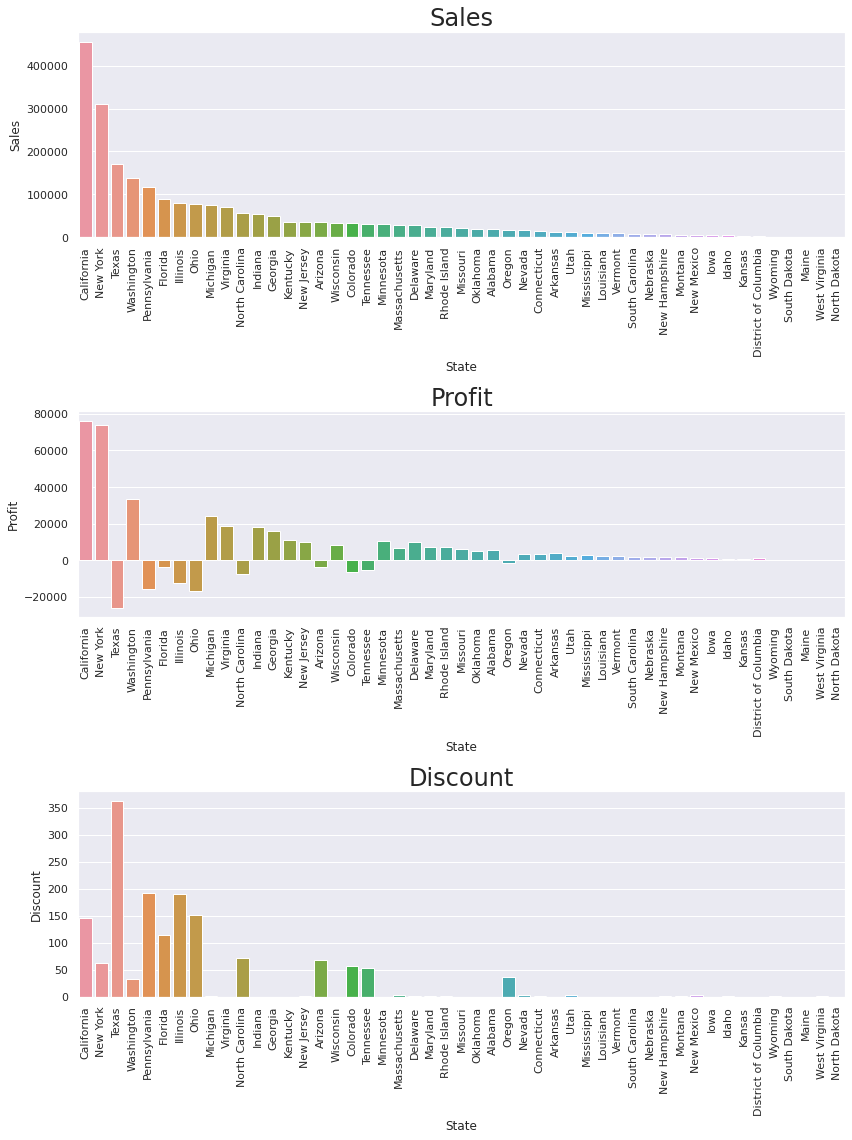

In [15]:
plt.figure(figsize=(12*number_of_columns, 8*number_of_rows))

for i in range(0, len(cols)):
    plt.subplot(number_of_rows + 1, number_of_columns, i+1)
    plt.title(cols[i], fontsize='24')
    sns.barplot(data=statewise, x='State', y=cols[i], orient='v')
    plt.xticks(rotation=90)
    plt.tight_layout();

California has the highest number of sales and profit with New York following it in both areas. The third highest sales are in Texas but the profit is negative due to highest discount rate. This negative correlation is observed with many states such as Pennsylvania, Illinois and Ohio.

#### Citywise

In [16]:
citywise = pd.DataFrame.from_dict(counts['City']).sort_values('Sales', ascending=False)
citywise

,City,Sales,Discount,Profit
329,New York City,255841.105,51.00,62004.5903
266,Los Angeles,175296.817,54.90,30308.4841
452,Seattle,119460.282,27.80,29121.6825
438,San Francisco,112184.813,33.85,17482.9366
374,Philadelphia,108948.109,174.30,-13869.1219
...,...,...,...,...
354,Ormond Beach,2.808,0.70,-1.9656
370,Pensacola,2.214,0.70,-1.4760
221,Jupiter,2.064,0.20,0.1548
140,Elyria,1.824,0.70,-1.3984


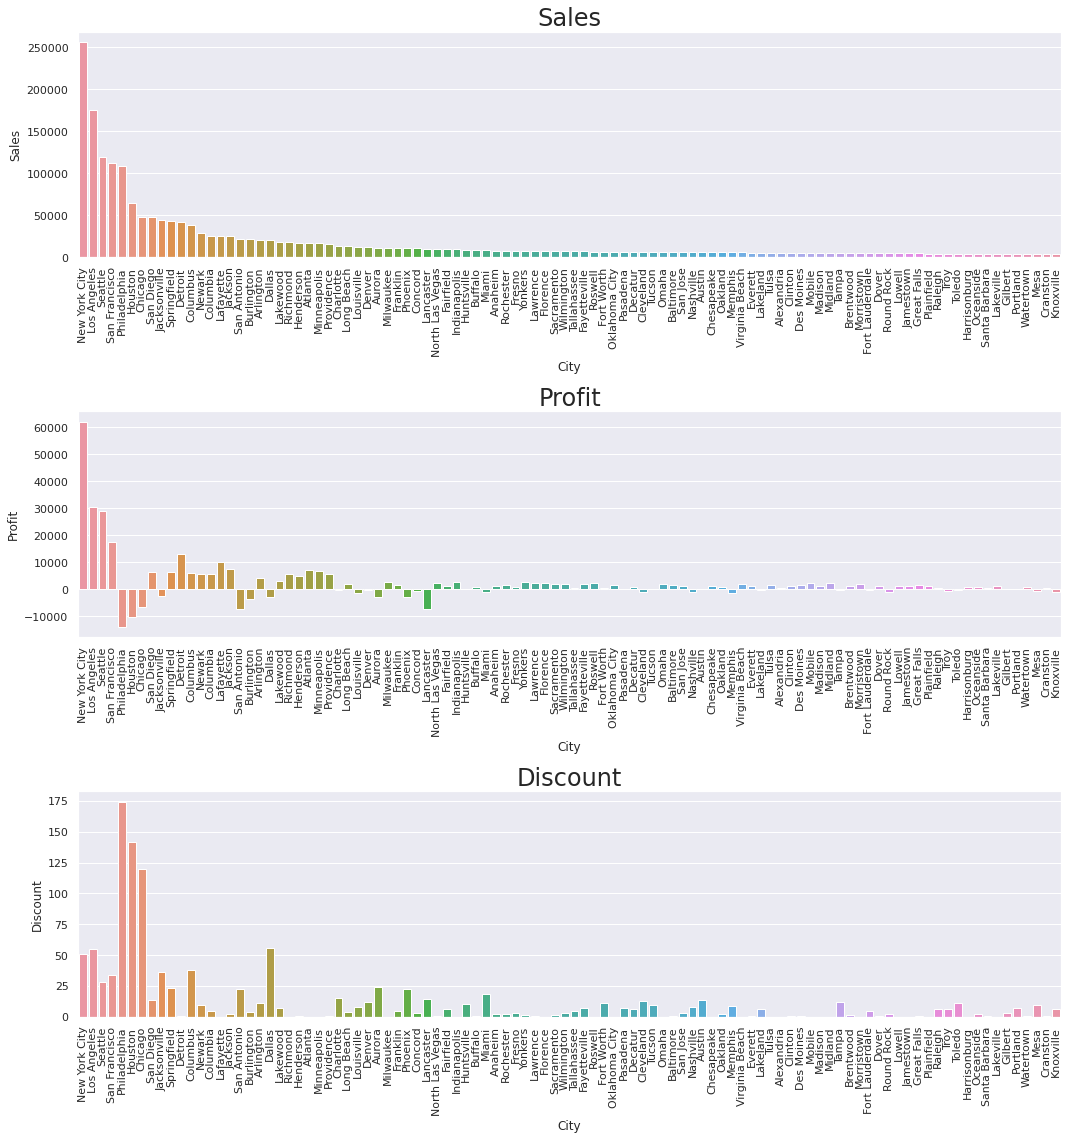

In [17]:
plt.figure(figsize=(15*number_of_columns, 8*number_of_rows))

for i in range(0, len(cols)):
    plt.subplot(number_of_rows + 1, number_of_columns, i+1)
    plt.title(cols[i], fontsize='24')
    sns.barplot(data=citywise.head(100), x='City', y=cols[i])
    plt.xticks(rotation=90)
    plt.tight_layout();

The same trend is observed in cities of negative correlation of profit and discount, with highest sales and profit in New York City, Los Angeles, and Seattle.

### Ship Mode, Segment, Region and Category plots

In [18]:
themes = ['Pastel1', 'PuOr', 'coolwarm', 'bwr']

text_cols = ['Ship Mode', 'Segment', 'Region', 'Category']
number_of_columns = 4
number_of_rows = len(text_cols)-1 / number_of_columns

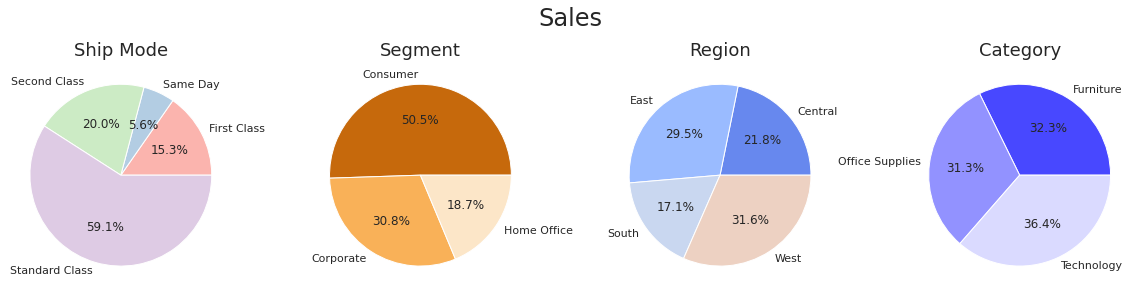

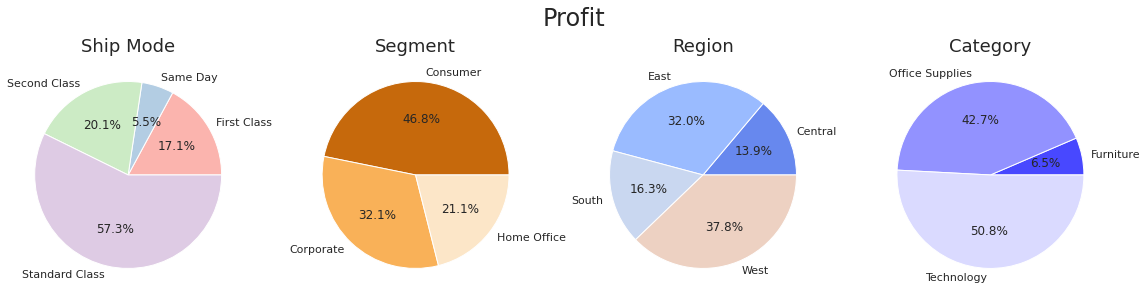

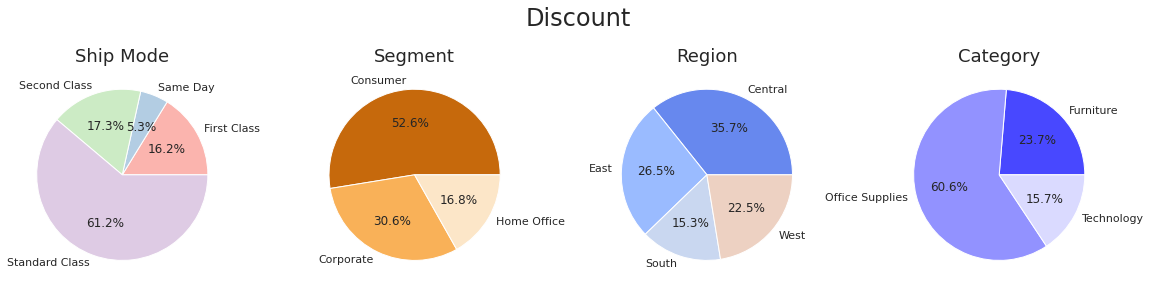

In [19]:
# Sales
plt.figure(figsize=(4*number_of_columns, 4*number_of_rows))
plt.suptitle('Sales', fontsize='24')

for i in range(0,len(text_cols)):
    sns.set_theme(palette=themes[i])
    plt.subplot(number_of_rows+1, number_of_columns, i+1)
    plt.title(text_cols[i], fontsize='18')

    plt.pie(retail_data.groupby(text_cols[i]).sum().Sales,
            labels=retail_data.groupby(text_cols[i]).sum().Sales.index, autopct = '%1.1f%%')

    plt.tight_layout();

# Profit
plt.figure(figsize=(4*number_of_columns, 4*number_of_rows))
plt.suptitle('Profit', fontsize='24')

for i in range(0,len(text_cols)):
    sns.set_theme(palette=themes[i])
    plt.subplot(number_of_rows+1, number_of_columns, i+1)
    plt.title(text_cols[i], fontsize='18')

    plt.pie(retail_data.groupby(text_cols[i]).sum().Profit,
            labels=retail_data.groupby(text_cols[i]).sum().Profit.index, autopct = '%1.1f%%')

    plt.tight_layout();

# Discount
plt.figure(figsize=(4*number_of_columns, 4*number_of_rows))
plt.suptitle('Discount', fontsize='24')

for i in range(0,len(text_cols)):
    sns.set_theme(palette=themes[i])
    plt.subplot(number_of_rows+1, number_of_columns, i+1)
    plt.title(text_cols[i], fontsize='18')

    plt.pie(retail_data.groupby(text_cols[i]).sum().Discount,
            labels=retail_data.groupby(text_cols[i]).sum().Discount.index, autopct = '%1.1f%%')

    plt.tight_layout();

| SALES     | Highest       | Lowest       |
| :-------: | :-----------: | :----------: |
| Ship Mode | Standard      | Same Day     |
| Segment   | Consumer      | Home Office  |
| Region    | West          | South        |
| Category  | Almost equal  | Almost equal |

| PROFIT    | Highest       | Lowest       |
| :-------: | :-----------: | :----------: |
| Ship Mode | Standard      | Same Day     |
| Segment   | Consumer      | Home Office  |
| Region    | West          | Central      |
| Category  | Technology    | Furniture    |

| DISCOUNT  | Highest          | Lowest       |
| :-------: | :--------------: | :----------: |
| Ship Mode | Standard         | Same Day     |
| Segment   | Consumer         | Home Office  |
| Region    | Central          | South        |
| Category  | Office Supplies  | Technology   |

### Sub-Categorical and Categorical data

In [20]:
categorical_data = retail_data.groupby(['Category','Sub-Category'], as_index=False).sum()
categorical_data

,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Furniture,Bookcases,114166.9293,863,47.79,-3398.7542
1,Furniture,Chairs,327777.7610,2351,104.70,26567.1278
2,Furniture,Furnishings,91658.4440,3555,132.40,13042.0534
3,Furniture,Tables,206965.5320,1241,83.35,-17725.4811
4,Office Supplies,Appliances,107532.1610,1729,77.60,18138.0054
5,Office Supplies,Art,27065.7320,2986,59.60,6511.8388
6,Office Supplies,Binders,203328.8590,5961,564.80,30205.2603
7,Office Supplies,Envelopes,16476.4020,906,20.40,6964.1767
8,Office Supplies,Fasteners,3024.2800,914,17.80,949.5182
9,Office Supplies,Labels,12385.7640,1387,24.80,5499.1558


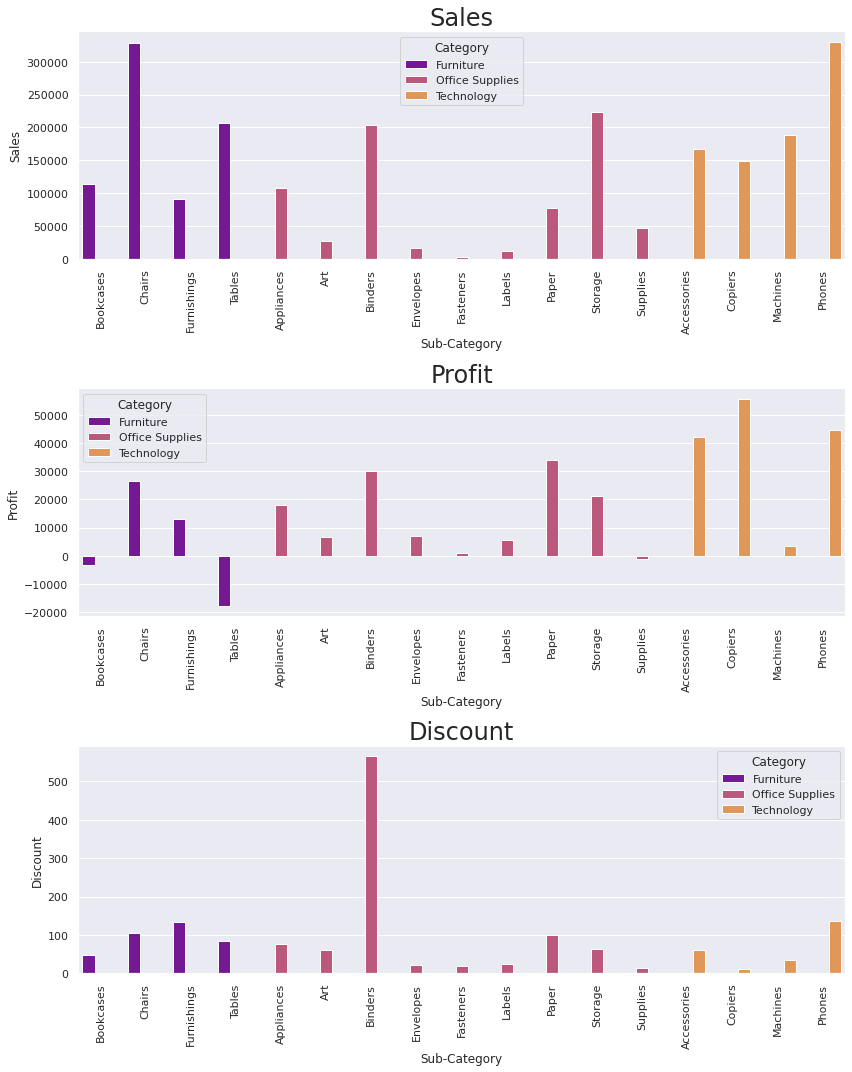

In [21]:
number_of_columns = 1
plt.figure(figsize=(12*number_of_columns, 5*number_of_rows))

for i in range(0, len(cols)):
    plt.subplot(number_of_rows + 1, number_of_columns, i+1)
    plt.title(cols[i], fontsize='24')
    sns.barplot(data=categorical_data, x='Sub-Category', y=cols[i],
                hue='Category', palette='plasma')
    plt.xticks(rotation=90)
    plt.tight_layout();

* Furniture and Technology Sub-Categories have the highest Sales.
* Technology Sub-Categories has the highest Profits. Tables, Bookcases, and Supplies are the only Sub-Categories with negative profits.
* Binders have much greater discounts than other Sub-Categories.

## Final Insights

1. Profit and Discount has a majorly negative correlation. This is also seen in the Statewise and Citywise data.


2. New York, Seattle, and Los Angeles are doing the best in terms of Sales and Profit.


3. Standard shipping is preferred by the majority. Same-Day deliveries are the least opted option, probably due to higher costs.


4. Home Office Segment, as well as the Southern and Central Regions should be focussed on more.


5. Furniture Sales are almost equal to the other 2 Categories but shows drastically low Profits. As seen in the Sub-Categorial plots, Tables and Bookcases are actually showing a loss (negative Profit) despite having top Sales in their Category.